# Лабораторная работа

В рамках лабораторной работы необходимо разработать параллельные алгоритмы, реализующие различные методы для вычисления интеграла $\int_{0}^{1}{\frac{4}{(1+x^{2})}}$.

В качестве методов численного интегрирования ,было необходимо рассмотреть следующие 4 метода: 
- метод прямоугольников, 
- метод трапеций, 
- метод Симпсона, 
- метод Гаусса 3-го порядка точности 


# Метод прямоугольников

Пусть требуется определить значение интеграла функции на отрезке $[a, b]$. Этот отрезок делится точками $x_0, x_1, \ldots, x_{n-1}, x_n$ на $n$ равных отрезков длиной $\Delta {x}={\frac{b-a}{n}}$.

Обозначим через $y_{0}, y_{1},\ldots ,y_{n-1},y_{n}$ значение функции $f\left(x\right)$ в точках $x_{0},x_{1},\ldots ,x_{n-1},x_{n}$. 

Далее составляем суммы $y_{0}\,\Delta {x} + y_{1}\, \Delta{x} + \ldots + y_{n-1}\, \Delta{x}$. Каждая из сумм — интегральная сумма для $f\left(x\right)$ на $\left[{a},{b}\right]$ и поэтому приближённо выражает интеграл

$$\int_{a}^{b}{f(x)\,dx} \approx {\frac {b-a}{n}} (y_{0} + y_{1} + \ldots + y_{n-1})$$

# Метод трапеций

Если функцию на каждом из частичных отрезков аппроксимировать прямой, проходящей через конечные значения, то получим метод трапеций.

Площадь трапеции на каждом отрезке:
$$I_{i} \approx {\frac {f(x_{i-1})+f(x_{i})}{2}}(x_{i}-x_{i-1})$$

Полная формула трапеций в случае деления всего промежутка интегрирования на отрезки одинаковой длины $h$:

$$I\approx h\left({\frac {f(x_{0})+f(x_{n})}{2}}+\sum _{i=1}^{n-1}f(x_{i})\right),$$ где $$ h={\frac {b-a}{n}}$$

# Метод Симпсона (метод парабол)

Использовав три точки отрезка интегрирования, можно заменить подынтегральную функцию параболой. Обычно в качестве таких точек используют концы отрезка и его среднюю точку. В этом случае формула имеет вид 

$$ I\approx {\frac {b-a}{6}}\left(f(a)+4f\left({\frac {a+b}{2}}\right)+f(b)\right)$$

# Метод Гаусса

Описанные выше методы используют фиксированные точки отрезка (концы и середину) и имеют низкий порядок точности (0 — методы правых и левых прямоугольников, 1 — методы средних прямоугольников и трапеций, 3 — метод парабол (Симпсона)). Если мы можем выбирать точки, в которых мы вычисляем значения функции $f(x)$, то можно при том же количестве вычислений подынтегральной функции получить методы более высокого порядка точности. Так для двух (как в методе трапеций) вычислений значений подынтегральной функции, можно получить метод уже не второго, а третьего порядка точности:

$$I\approx {\frac {b-a}{2}}\left(f\left({\frac {a+b}{2}}-{\frac {b-a}{2{\sqrt {3}}}}\right)+f\left({\frac {a+b}{2}}+{\frac {b-a}{2{\sqrt {3}}}}\right)\right)$$

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [15,8]
%matplotlib inline
import numpy as np
idx = pd.IndexSlice

### Локальная машина
Таблица зависимости среднего времени работы алгоритма (40 запусков) от числа процессов при значении шага интегрирования $=0.000001$

In [54]:
buff = pd.read_csv('fp_experiment_local_v2.csv')

In [106]:
fp_local_df = pd.read_csv('fp_experiment_local_v2.csv')
fp_local_df = fp_local_df.groupby(('Algorithm' , 'Cores')).aggregate({'time':['mean','std']})
fp_local_df.head()

time          
                     mean       std
Algorithm Cores                    
gauss.py  1      2.093678  0.285107
          2      1.567686  0.107121
          3      2.201583  0.961999
          4      2.412918  0.916904
          5      2.680061  0.901582

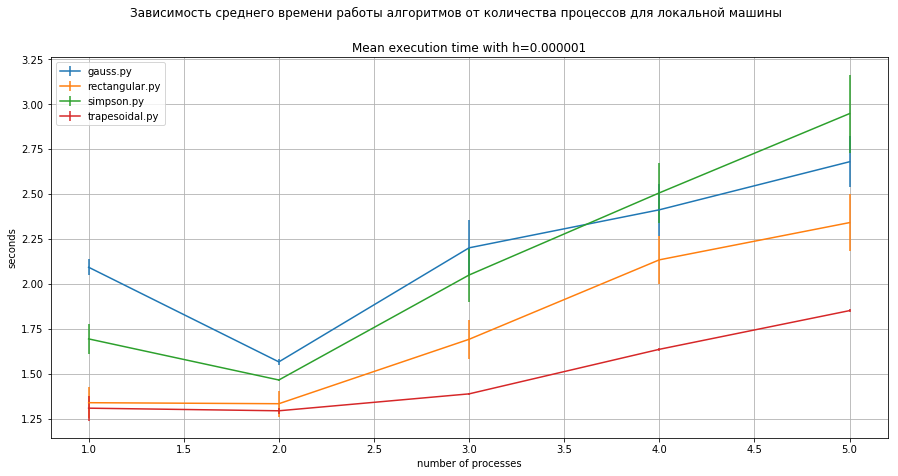

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

for method in fp_local_df.index.levels[0]:
#     print(fp_local_df.loc[method])
    d = fp_local_df.loc[method]
    ax.errorbar(x=d.index, y=d['time','mean'], yerr=d['time','std'] / np.sqrt(40), label=method)

fig.suptitle('Зависимость среднего времени работы алгоритмов от количества процессов для локальной машины')
ax.set_title('Mean execution time with h=0.000001')
ax.set_xlabel('number of processes')
ax.set_ylabel('seconds')
ax.grid()
ax.legend()

pass

Здесь видно что прирост в скоросте работы наблюдается только при переходе с одного потока на 2, это связано с тем, что локальная машина двухядерная. Дальнейшее увеличение потоков не дает прироста в связи с необходимостью системы оркестрировать потоки, превышающие число физических ядер.

#### Ускорение

Следующая таблица даёт нам значения ускорения при увеличении числа процессов. В качестве базового значения принимается значение на одном потоке.

In [102]:
import itertools
fp_local_df['time','acc'] =[fp_local_df.at[(it, 1),('time','mean')]/fp_local_df.at[(it,pit),('time','mean')] \
                             for it,pit in itertools.product(fp_local_df.index.levels[0], fp_local_df.index.levels[1])]
fp_local_df['time','acc']

Algorithm       Cores
gauss.py        1        1.000000
                2        1.335521
                3        0.950988
                4        0.867695
                5        0.781205
rectangular.py  1        1.000000
                2        1.004247
                3        0.791867
                4        0.628050
                5        0.572533
simpson.py      1        1.000000
                2        1.155756
                3        0.826842
                4        0.676273
                5        0.575170
trapesoidal.py  1        1.000000
                2        1.011215
                3        0.942792
                4        0.800220
                5        0.707292
Name: (time, acc), dtype: float64

#### Эффективность

В следующей таблице указаны значения для эффективности

In [104]:
fp_local_df['time','efficiency'] =[fp_local_df.at[(it,pit),('time','acc')]/pit \
                             for it,pit in itertools.product(fp_local_df.index.levels[0], fp_local_df.index.levels[1])]
fp_local_df['time','efficiency']

Algorithm       Cores
gauss.py        1        1.000000
                2        0.667761
                3        0.316996
                4        0.216924
                5        0.156241
rectangular.py  1        1.000000
                2        0.502123
                3        0.263956
                4        0.157013
                5        0.114507
simpson.py      1        1.000000
                2        0.577878
                3        0.275614
                4        0.169068
                5        0.115034
trapesoidal.py  1        1.000000
                2        0.505608
                3        0.314264
                4        0.200055
                5        0.141458
Name: (time, efficiency), dtype: float64

### Сервер
Таблица зависимости среднего времени работы алгоритма (40 запусков) от числа процессов при значении шага интегрирования $=0.000001$

In [105]:
fp_server_df = pd.read_csv('fp_experiment_cluster_v2.csv')
fp_server_df = fp_server_df.groupby(('Algorithm' , 'Cores')).aggregate({'time':['mean','std']})
fp_server_df.head()

time          
                     mean       std
Algorithm Cores                    
gauss.py  1      2.095461  0.087929
          2      1.466146  0.085021
          3      1.211740  0.089303
          4      1.062116  0.063448
          5      1.017842  0.045098

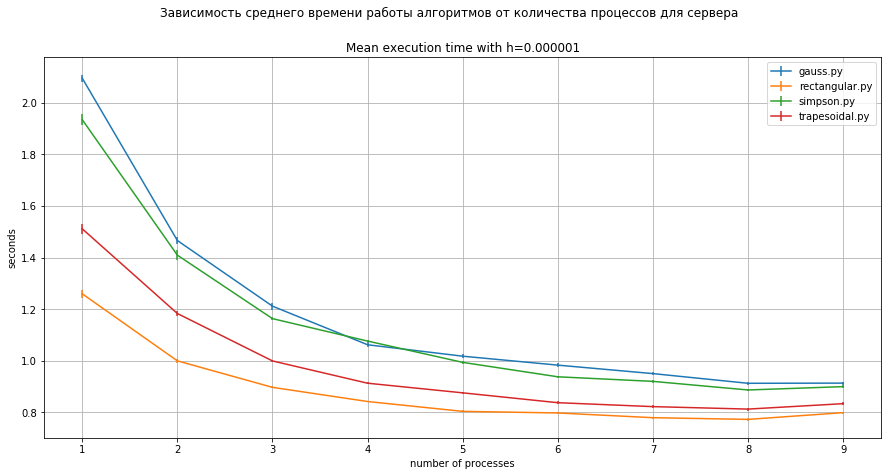

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

for method in fp_server_df.index.levels[0]:
#     print(fp_local_df.loc[method])
    d = fp_server_df.loc[method]
    ax.errorbar(x=d.index, y=d['time','mean'], yerr=d['time','std'] / np.sqrt(40), label=method)

fig.suptitle('Зависимость среднего времени работы алгоритмов от количества процессов для сервера')
ax.set_title('Mean execution time with h=0.000001')
ax.set_xlabel('number of processes')
ax.set_ylabel('seconds')
ax.grid()
ax.legend()

pass

Для данного эксперимента был использован 8-ми ядерный сервер, поэтому мы видим оптимальное время работы для 8-ми потоков, также, важно отметить, что увеличение потоков выше количества физических ядер снова дает ухудшение быстродействия алгоритмов.

### Ускорение и эффективность алгоритмов для произвольного числа процессов

Теоретически, наши алгоритмы должны давать линейное ускорение по числу потоков относительно однопоточного случая, однако, из графиков видно, что это не так. Это может быть связано как с тем, что в нашей имплементации родительский поток вынужден ждать всех остальных для сбора суммы всех частичных интегралов, так и с параллельным выполнением других процессов нашими машинами

#### Ускорение

Следующая таблица даёт нам значения ускорения при увеличении числа процессов. В качестве базового значения принимается значение на одном потоке.

In [98]:
import itertools
fp_server_df['time','acc'] =[fp_server_df.at[(it, 1),('time','mean')]/fp_server_df.at[(it,pit),('time','mean')] \
                             for it,pit in itertools.product(fp_server_df.index.levels[0], fp_server_df.index.levels[1])]
fp_server_df['time','acc']

Algorithm       Cores
gauss.py        1        1.000000
                2        1.429231
                3        1.729299
                4        1.972912
                5        2.058730
                6        2.131331
                7        2.204999
                8        2.295762
                9        2.293972
rectangular.py  1        1.000000
                2        1.259997
                3        1.404210
                4        1.495797
                5        1.566812
                6        1.578942
                7        1.616114
                8        1.629865
                9        1.576536
simpson.py      1        1.000000
                2        1.372628
                3        1.662991
                4        1.797256
                5        1.946655
                6        2.062634
                7        2.102382
                8        2.181466
                9        2.150019
trapesoidal.py  1        1.000000
                2        1

#### Эффективность

В следующей таблице указаны значения для эффективности

In [101]:
fp_server_df['time','efficiency'] =[fp_server_df.at[(it,pit),('time','acc')]/pit \
                             for it,pit in itertools.product(fp_server_df.index.levels[0], fp_server_df.index.levels[1])]
fp_server_df['time','efficiency']

Algorithm       Cores
gauss.py        1        1.000000
                2        0.714616
                3        0.576433
                4        0.493228
                5        0.411746
                6        0.355222
                7        0.315000
                8        0.286970
                9        0.254886
rectangular.py  1        1.000000
                2        0.629998
                3        0.468070
                4        0.373949
                5        0.313362
                6        0.263157
                7        0.230873
                8        0.203733
                9        0.175171
simpson.py      1        1.000000
                2        0.686314
                3        0.554330
                4        0.449314
                5        0.389331
                6        0.343772
                7        0.300340
                8        0.272683
                9        0.238891
trapesoidal.py  1        1.000000
                2        0

### Сервер
Таблица зависимости среднего времени работы алгоритма (40 запусков) c числом процессов $= 8$ с изменяемой верхней границей и постоянным шагом интегрирования $=0.000005$

In [61]:
sp_server_df = pd.read_csv('sp_experiment_cluster_v2.csv')
sp_server_df = sp_server_df.groupby(('Algorithm' , 'N(b)')).aggregate({'time':['mean','std']})
sp_server_df.head()

time          
                        mean       std
Algorithm N(b)                        
gauss.py  1.000000  1.236582  4.716046
          1.230769  0.510414  0.029085
          1.461538  0.521928  0.027906
          1.692308  0.527585  0.031140
          1.923077  0.540996  0.030054

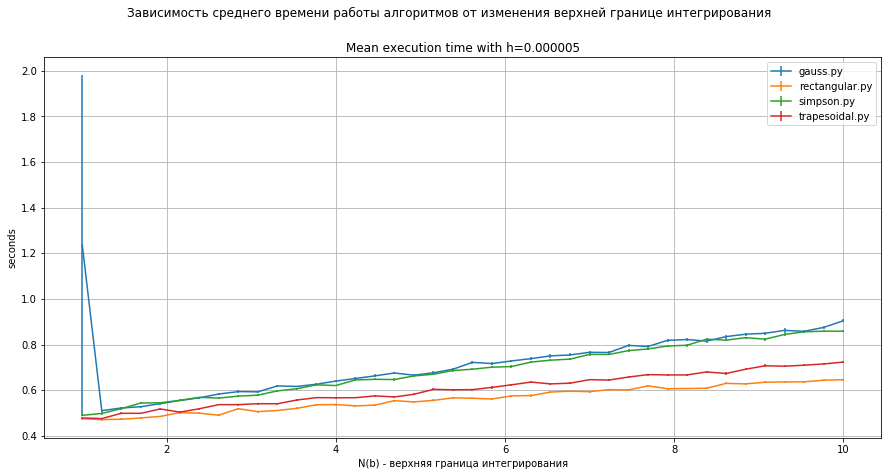

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

for method in sp_server_df.index.levels[0]:
#     print(fp_local_df.loc[method])
    d = sp_server_df.loc[method]
    ax.errorbar(x=d.index, y=d['time','mean'], yerr=d['time','std'] / np.sqrt(40), label=method)

fig.suptitle('Зависимость среднего времени работы алгоритмов от изменения верхней границе интегрирования')
ax.set_title('Mean execution time with h=0.000005')
ax.set_xlabel('N(b) - верхняя граница интегрирования')
ax.set_ylabel('seconds')
ax.grid()
ax.legend()

pass

Первые 2 выброса на графиках следует отнести к тому, что на сервере в это время могло что-нибудь запуститься. В целом, видно, что время вычисление интеграла нашими методами линейно зависит от изменения верхней границы интегрирования (увеличения интервала)